In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from plotly import express as px
from plotly import graph_objects as go
import dash
from dash import dcc
from dash import html

In [3]:
start_time = datetime.datetime.now()

data = pd.read_excel('/Users/tinashem/Github Repos/CareerPalz/files/LCA_Disclosure_Data_FY2023_Q4_copy.xlsx')

end_time = datetime.datetime.now()

print('Duration: {}'.format(end_time - start_time))

Duration: 0:02:33.991969


In [4]:
data.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
0,I-200-23244-317261,Certified - Withdrawn,2023-09-01,2023-09-30,2023-09-11,H-1B,"Analyst, Business Sr",15-2031.00,Operations Research Analysts,Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
1,I-202-23242-306442,Certified - Withdrawn,2023-08-30,2023-09-30,2023-09-07,H-1B1 Singapore,Board Certified Behavior Analyst,19-3034.00,School Psychologists,Y,...,NaN,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
2,I-200-23242-308144,Certified - Withdrawn,2023-08-30,2023-09-30,2023-09-07,H-1B,Manager - Software Engineering,15-1252.00,Software Developers,Y,...,No,Yes,"$60,000 or higher annual wage",NaN,Disclose Business,Sheppard,Kaitlyn (11606.425.22),NaN,Berry Appleman & Leiden LLP,ksheppard@bal.com
3,I-200-23172-131625,Certified - Withdrawn,2023-06-21,2023-09-30,2023-06-28,H-1B,SOFTWARE DEVELOPER,15-1252.00,Software Developers,Y,...,No,Yes,"$60,000 or higher annual wage",NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
4,I-200-23170-125146,Certified - Withdrawn,2023-06-19,2023-09-30,2023-06-26,H-1B,SOFTWARE DEVELOPER,15-1252.00,Software Developers,Y,...,No,Yes,"$60,000 or higher annual wage",NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127939 entries, 0 to 127938
Data columns (total 96 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CASE_NUMBER                     127939 non-null  object        
 1   CASE_STATUS                     127939 non-null  object        
 2   RECEIVED_DATE                   127939 non-null  datetime64[ns]
 3   DECISION_DATE                   127939 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              9382 non-null    datetime64[ns]
 5   VISA_CLASS                      127939 non-null  object        
 6   JOB_TITLE                       127939 non-null  object        
 7   SOC_CODE                        127939 non-null  object        
 8   SOC_TITLE                       127939 non-null  object        
 9   FULL_TIME_POSITION              127939 non-null  object        
 10  BEGIN_DATE                      127939 non-null  datetim

In [6]:
data['NEW_EMPLOYMENT'].nunique()

30

In [7]:
data['NEW_EMPLOYMENT'].unique()

array([   0,    1,    3,    5,    2,   50,   75,   12,   25,   20,    4,
         30,   10,   22,    8,    6,   13,   15,    7,  300,  100,   37,
          9,   14,  223, 1098,   11,   40,   60,   80])

In [8]:
data['NEW_EMPLOYMENT'].value_counts()

NEW_EMPLOYMENT
0       85137
1       39919
5         962
2         555
10        409
6         354
4         235
3          99
20         82
100        55
25         26
15         19
50         18
12         17
75         14
7          11
30          8
8           4
300         4
13          1
22          1
37          1
9           1
14          1
223         1
1098        1
11          1
40          1
60          1
80          1
Name: count, dtype: int64

In [9]:
# let's create a separate data frame for entries that have new employment
new_employment = data[data['NEW_EMPLOYMENT'] != 0]
new_employment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42802 entries, 3 to 127933
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     42802 non-null  object        
 1   CASE_STATUS                     42802 non-null  object        
 2   RECEIVED_DATE                   42802 non-null  datetime64[ns]
 3   DECISION_DATE                   42802 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              3442 non-null   datetime64[ns]
 5   VISA_CLASS                      42802 non-null  object        
 6   JOB_TITLE                       42802 non-null  object        
 7   SOC_CODE                        42802 non-null  object        
 8   SOC_TITLE                       42802 non-null  object        
 9   FULL_TIME_POSITION              42802 non-null  object        
 10  BEGIN_DATE                      42802 non-null  datetime64[ns]
 11  END_DA

In [10]:
# let's find out the number of unique employers who have new employment
new_employment['EMPLOYER_NAME'].nunique()

13112

In [11]:
new_employment['EMPLOYER_NAME'].unique()

array(['Edvenswa Tech Inc', ' Mateu Architecture, Inc.',
       'Propel Infotech Inc', ...,
       'Pratt Rehabilitation Medicine Associates, Inc. (TMCPO)',
       'Virtualan Software, LLC', 'Virginia Electric and Power Company'],
      dtype=object)

In [12]:
# let's investigate how many new employers had certified LCA's
new_employment['CASE_STATUS'].unique()

array(['Certified - Withdrawn', 'Withdrawn', 'Denied', 'Certified'],
      dtype=object)

In [13]:
# let's investigate how many new employers had certified LCA's
certified = new_employment[new_employment['CASE_STATUS'] == 'Certified']
certified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38328 entries, 185 to 127927
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     38328 non-null  object        
 1   CASE_STATUS                     38328 non-null  object        
 2   RECEIVED_DATE                   38328 non-null  datetime64[ns]
 3   DECISION_DATE                   38328 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      38328 non-null  object        
 6   JOB_TITLE                       38328 non-null  object        
 7   SOC_CODE                        38328 non-null  object        
 8   SOC_TITLE                       38328 non-null  object        
 9   FULL_TIME_POSITION              38328 non-null  object        
 10  BEGIN_DATE                      38328 non-null  datetime64[ns]
 11  END_

In [14]:
certified.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
185,I-200-23267-376299,Certified,2023-09-24,2023-09-29,NaT,H-1B,Postdoctoral Research Fellos,19-1042.00,"Medical Scientists, Except Epidemiologists",Y,...,No,Yes,"Both $60,000 or higher in annual wage and Mast...",NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
189,I-200-23267-376413,Certified,2023-09-24,2023-09-29,NaT,H-1B,Associate Director JC40 - Management Analysts,13-1111.00,Management Analysts,Y,...,No,Yes,"$60,000 or higher annual wage",NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
194,I-200-23267-376365,Certified,2023-09-24,2023-09-29,NaT,H-1B,Sr. Software Engineer,15-1252.00,Software Developers,Y,...,No,Yes,"$60,000 or higher annual wage",NaN,Disclose Business,Kennedy,Adaikala Mary,NaN,"Law Offices of Mary Kennedy, LLC",legal@mkimmigrationlaw.com
196,I-200-23267-376282,Certified,2023-09-24,2023-09-29,NaT,H-1B,DEVOPS ENGINEER,15-1251.00,Computer Programmers,Y,...,No,Yes,"$60,000 or higher annual wage",NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
199,I-200-23268-376550,Certified,2023-09-24,2023-09-29,NaT,H-1B,Computer Programmer,15-1251.00,Computer Programmers,Y,...,No,Yes,"$60,000 or higher annual wage",NaN,Disclose Business,Alic,Emina,NaN,"Fakhoury Global Immigration, USA PC",aishwaryat@employmentimmigration.com


In [58]:
# display all rows
# pd.set_option("display.max_rows", None)

In [59]:
# let's look at how many different job titles were given certified LCA's
certified['JOB_TITLE'].value_counts()

JOB_TITLE
Software Engineer                                               1777
Software Developer                                              1397
Assistant Professor                                              559
SOFTWARE DEVELOPER                                               368
Senior Associate JC60 -Computer Systems Engineers/Architects     364
Data Scientist                                                   291
Associate                                                        279
Manager JC50 - Computer Systems Engineers/Architects             249
SOFTWARE ENGINEER                                                238
Analyst                                                          212
Research Scientist                                               204
Data Engineer                                                    201
Senior Software Engineer                                         199
Medical Technologist                                             174
Research Associate      

In [60]:
# Were they all H-1B visas?
certified['VISA_CLASS'].value_counts()

VISA_CLASS
H-1B               37108
E-3 Australian       841
H-1B1 Chile          257
H-1B1 Singapore      122
Name: count, dtype: int64

In [61]:
certified_h1b = certified[certified['VISA_CLASS'] == 'H-1B']
certified_h1b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37108 entries, 185 to 127927
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     37108 non-null  object        
 1   CASE_STATUS                     37108 non-null  object        
 2   RECEIVED_DATE                   37108 non-null  datetime64[ns]
 3   DECISION_DATE                   37108 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      37108 non-null  object        
 6   JOB_TITLE                       37108 non-null  object        
 7   SOC_CODE                        37108 non-null  object        
 8   SOC_TITLE                       37108 non-null  object        
 9   FULL_TIME_POSITION              37108 non-null  object        
 10  BEGIN_DATE                      37108 non-null  datetime64[ns]
 11  END_

In [62]:
certified_h1b['JOB_TITLE'].value_counts()

JOB_TITLE
Software Engineer                                               1767
Software Developer                                              1389
Assistant Professor                                              557
SOFTWARE DEVELOPER                                               364
Senior Associate JC60 -Computer Systems Engineers/Architects     364
Data Scientist                                                   290
Associate                                                        267
Manager JC50 - Computer Systems Engineers/Architects             249
SOFTWARE ENGINEER                                                234
Analyst                                                          206
Research Scientist                                               203
Data Engineer                                                    200
Senior Software Engineer                                         196
Medical Technologist                                             174
Research Associate      

In [63]:
# ['business analyst', 'data analyst', 'data engineer', 'data scientist', 'data']
# let's filter out the job titles that are relevant to data science
data_jobs = certified_h1b[certified_h1b['JOB_TITLE'].str.contains('data', case=False)]
data_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2033 entries, 343 to 127746
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     2033 non-null   object        
 1   CASE_STATUS                     2033 non-null   object        
 2   RECEIVED_DATE                   2033 non-null   datetime64[ns]
 3   DECISION_DATE                   2033 non-null   datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      2033 non-null   object        
 6   JOB_TITLE                       2033 non-null   object        
 7   SOC_CODE                        2033 non-null   object        
 8   SOC_TITLE                       2033 non-null   object        
 9   FULL_TIME_POSITION              2033 non-null   object        
 10  BEGIN_DATE                      2033 non-null   datetime64[ns]
 11  END_D

In [64]:
data_jobs['JOB_TITLE'].value_counts()

JOB_TITLE
Data Scientist                                                  290
Data Engineer                                                   200
Data Analyst                                                    120
Database Administrator                                           50
Senior Data Scientist                                            41
Senior Data Analyst                                              40
Data Scientist II                                                28
Data Engineer I                                                  27
Data Engineer                                                    20
Senior Data Engineer                                             20
Data Science                                                     20
DATA SCIENTIST                                                   19
Data Engineer II                                                 18
Data Analyst                                                     18
DATA ENGINEER                         

In [65]:
# let's filter out the job titles that are relevant to statistics
# case=False ignores the case of the letters
stat_jobs = certified_h1b[certified_h1b['JOB_TITLE'].str.contains('statistic', case=False)]
stat_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113 entries, 1264 to 127614
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     113 non-null    object        
 1   CASE_STATUS                     113 non-null    object        
 2   RECEIVED_DATE                   113 non-null    datetime64[ns]
 3   DECISION_DATE                   113 non-null    datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      113 non-null    object        
 6   JOB_TITLE                       113 non-null    object        
 7   SOC_CODE                        113 non-null    object        
 8   SOC_TITLE                       113 non-null    object        
 9   FULL_TIME_POSITION              113 non-null    object        
 10  BEGIN_DATE                      113 non-null    datetime64[ns]
 11  END_D

In [66]:
stat_jobs['JOB_TITLE'].value_counts()

JOB_TITLE
Biostatistician                                            10
Statistician                                                6
Principal Biostatistician                                   5
Senior Biostatistician II                                   4
Statistical Programmer I                                    4
Senior Biostatistician                                      3
Biostatistician II                                          3
Biostatistician 2                                           2
STATISTICAL ANALYST                                         2
Statisticians - KBGFJG179786-2                              2
Sr. Computational Statistician                              2
Principal Biostatistician                                   2
Senior Statistician                                         2
Senior Scientist, Biostatistics                             2
Biostatistician                                             2
Associate Director, Biostatistics                           

In [67]:
stat_jobs['EMPLOYER_NAME'].value_counts()

EMPLOYER_NAME
Vertex Pharmaceuticals Incorporated                                 4
Regeneron Pharmaceuticals, Inc.                                     4
Gilead Sciences, Inc.                                               3
Eli Lilly and Company                                               3
Merck Sharp & Dohme LLC                                             2
Medical College of Wisconsin, Inc.                                  2
Incyte Corporation                                                  2
ABBVIE INC.                                                         2
The University of Chicago                                           2
EDETEK Inc.                                                         2
LLX Solutions, LLC                                                  2
Fortrea Clinical Research Unit Inc.                                 2
Ernst & Young U.S. LLP                                              2
Iowa State University of Science and Technology                     2
Fortre

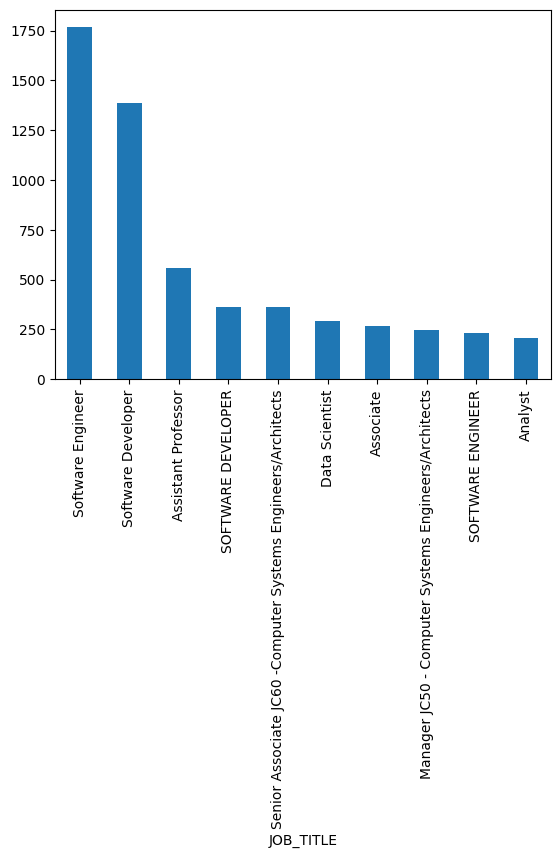

In [68]:
certified_h1b['JOB_TITLE'].value_counts()[0:10].plot(kind='bar');

In [69]:
certified_h1b['PREVAILING_WAGE'].info()

<class 'pandas.core.series.Series'>
Index: 37108 entries, 185 to 127927
Series name: PREVAILING_WAGE
Non-Null Count  Dtype  
--------------  -----  
37108 non-null  float64
dtypes: float64(1)
memory usage: 579.8 KB


In [70]:
# let's see what the prevailing wage was for all of the entries whose unit of pay was the 'Year'
certified_h1b_year = certified_h1b[certified_h1b['PW_UNIT_OF_PAY'] == 'Year']
certified_h1b_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34417 entries, 185 to 127927
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     34417 non-null  object        
 1   CASE_STATUS                     34417 non-null  object        
 2   RECEIVED_DATE                   34417 non-null  datetime64[ns]
 3   DECISION_DATE                   34417 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      34417 non-null  object        
 6   JOB_TITLE                       34417 non-null  object        
 7   SOC_CODE                        34417 non-null  object        
 8   SOC_TITLE                       34417 non-null  object        
 9   FULL_TIME_POSITION              34417 non-null  object        
 10  BEGIN_DATE                      34417 non-null  datetime64[ns]
 11  END_

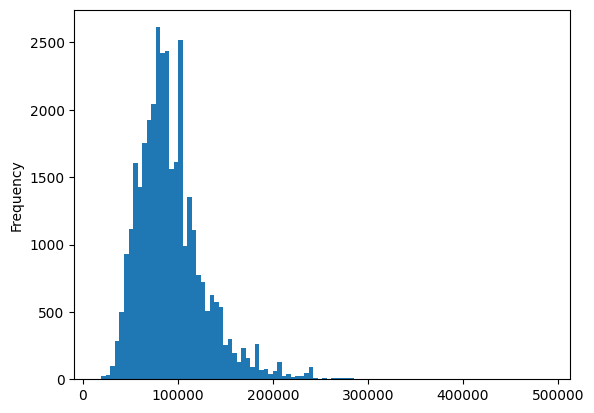

In [71]:
# let's see what the different PREVAILING_WAGE values are for the certified_h1b_year data frame
certified_h1b_year['PREVAILING_WAGE'].plot(kind='hist', bins=100);

In [72]:
# using the NAICS code, let's find out which employers were colleges and universities
colleges_and_universities = certified_h1b_year[certified_h1b_year['NAICS_CODE'] == 611310]
colleges_and_universities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3388 entries, 203 to 127920
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     3388 non-null   object        
 1   CASE_STATUS                     3388 non-null   object        
 2   RECEIVED_DATE                   3388 non-null   datetime64[ns]
 3   DECISION_DATE                   3388 non-null   datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      3388 non-null   object        
 6   JOB_TITLE                       3388 non-null   object        
 7   SOC_CODE                        3388 non-null   object        
 8   SOC_TITLE                       3388 non-null   object        
 9   FULL_TIME_POSITION              3388 non-null   object        
 10  BEGIN_DATE                      3388 non-null   datetime64[ns]
 11  END_D

In [73]:
certified_h1b_year[certified_h1b_year['NAICS_CODE'] == 611310]['EMPLOYER_NAME'].unique()

array(['University of Kentucky',
       'Administrators of the Tulane Educational Fund',
       'University of Georgia; OGE', 'Lamar University',
       'Harvard University', 'Cleveland State University',
       'Cornell University', 'Louisiana State University and A&M College',
       'Bard College', 'University of Pittsburgh',
       'The University of Virginia',
       'TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA',
       'Temple University--A Commonwealth University',
       'University of Texas at Arlington',
       'The University of Texas Health Science Center at Houston',
       'WICHITA STATE UNIVERSITY', 'ALBANY MEDICAL COLLEGE',
       'SOUTHERN METHODIST UNIVERSITY',
       'The Trustees of Princeton University', 'Yale University',
       'University of Minnesota', 'Gettysburg College',
       'New York University', 'East Carolina University',
       'University of Massachusetts Boston',
       'University of California, Berkeley', 'Oregon State University',
       'The Univ

In [74]:
dir(colleges_and_universities['EMPLOYER_NAME'].unique())

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '

In [75]:
colleges_and_universities['EMPLOYER_NAME'].unique().__len__()

600

In [76]:
colleges_and_universities['EMPLOYER_NAME'].unique().size

600

In [77]:
colleges_and_universities['JOB_TITLE'].value_counts()

JOB_TITLE
Assistant Professor                                             527
Postdoctoral Fellow                                             108
Research Associate                                              108
Postdoctoral Research Associate                                 100
Postdoctoral Scholar                                             76
Postdoctoral Associate                                           73
Postdoctoral Research Fellow                                     57
Research Scientist                                               57
Assistant Professor                                              55
Lecturer                                                         38
Instructor                                                       35
Postdoctoral Researcher                                          35
Research Assistant Professor                                     32
Associate Research Scientist                                     31
ASSISTANT PROFESSOR                   

In [78]:
colleges_and_universities['EMPLOYER_NAME'].value_counts()

EMPLOYER_NAME
The Leland Stanford, Jr University                                                          74
University of Michigan                                                                      73
TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA                                                  53
Columbia University                                                                         46
University of California, Los Angeles                                                       45
The University of Chicago                                                                   44
University of Illinois                                                                      44
University of Pittsburgh                                                                    43
The University of Virginia                                                                  40
The Trustees of Princeton University                                                        39
Mayo Clinic                         

In [79]:
# let's find colleges and universities in Pennsylvania
colleges_and_universities['WORKSITE_STATE'].value_counts()

WORKSITE_STATE
CA    387
TX    322
NY    288
PA    172
IL    150
FL    138
MI    116
MA    115
GA    111
NC    107
MO    101
NJ     99
IN     92
MD     92
VA     87
MN     82
OH     79
AL     63
WI     62
CT     60
CO     51
TN     50
LA     45
AZ     44
IA     41
UT     39
OR     35
AR     33
OK     32
KS     32
WA     30
SC     27
NE     21
DC     18
NM     16
MS     15
KY     15
WV     15
RI     13
NH     12
ND     10
ID     10
SD      9
DE      8
VT      8
MT      8
WY      8
HI      6
NV      6
ME      4
VI      2
GU      1
PR      1
Name: count, dtype: int64

In [80]:
colleges_and_universities_pa = colleges_and_universities[colleges_and_universities['WORKSITE_STATE'] == 'PA']
colleges_and_universities_pa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 833 to 127868
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     172 non-null    object        
 1   CASE_STATUS                     172 non-null    object        
 2   RECEIVED_DATE                   172 non-null    datetime64[ns]
 3   DECISION_DATE                   172 non-null    datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      172 non-null    object        
 6   JOB_TITLE                       172 non-null    object        
 7   SOC_CODE                        172 non-null    object        
 8   SOC_TITLE                       172 non-null    object        
 9   FULL_TIME_POSITION              172 non-null    object        
 10  BEGIN_DATE                      172 non-null    datetime64[ns]
 11  END_DA

In [81]:
colleges_and_universities_pa['EMPLOYER_NAME'].nunique()

19

In [82]:
colleges_and_universities_pa['EMPLOYER_NAME'].unique()

array(['University of Pittsburgh',
       'TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA',
       'Temple University--A Commonwealth University',
       'Gettysburg College', 'The Pennsylvania State University',
       'Carnegie Mellon University', 'Lehigh University',
       'Drexel University', 'Thomas Jefferson University',
       'Wright Center for Graduate Medical Education',
       'Mercyhurst University', 'Duquesne University',
       'Alvernia University', 'Widener University', 'Gannon University',
       'Eastern University', 'MICHIGAN STATE UNIVERSITY',
       'Bucknell University', 'URSINUS COLLEGE'], dtype=object)

Using the Reuters article linked [here](https://www.reuters.com/markets/us/us-job-growth-slows-april-unemployment-rate-rises-39-2024-05-03/), let's find out about the companies that are classified as being in the healthcare sector using the NAICS classification system.

In [83]:
# let's find out which companies are in the healthcare sector using the NAICS codes
healthcare = certified_h1b_year.copy()
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34417 entries, 185 to 127927
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     34417 non-null  object        
 1   CASE_STATUS                     34417 non-null  object        
 2   RECEIVED_DATE                   34417 non-null  datetime64[ns]
 3   DECISION_DATE                   34417 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      34417 non-null  object        
 6   JOB_TITLE                       34417 non-null  object        
 7   SOC_CODE                        34417 non-null  object        
 8   SOC_TITLE                       34417 non-null  object        
 9   FULL_TIME_POSITION              34417 non-null  object        
 10  BEGIN_DATE                      34417 non-null  datetime64[ns]
 11  END_

In [84]:
# convert column to string to make searching easier
healthcare['NAICS_CODE'] = [str(x) for x in healthcare['NAICS_CODE']]
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34417 entries, 185 to 127927
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     34417 non-null  object        
 1   CASE_STATUS                     34417 non-null  object        
 2   RECEIVED_DATE                   34417 non-null  datetime64[ns]
 3   DECISION_DATE                   34417 non-null  datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      34417 non-null  object        
 6   JOB_TITLE                       34417 non-null  object        
 7   SOC_CODE                        34417 non-null  object        
 8   SOC_TITLE                       34417 non-null  object        
 9   FULL_TIME_POSITION              34417 non-null  object        
 10  BEGIN_DATE                      34417 non-null  datetime64[ns]
 11  END_

In [85]:
type(healthcare['NAICS_CODE'].values[0])

str

In [86]:
# 62 is sector 62 according to the NAICS
healthcare_companies = healthcare[healthcare['NAICS_CODE'].str.startswith('62')]
healthcare_companies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1514 entries, 185 to 127900
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     1514 non-null   object        
 1   CASE_STATUS                     1514 non-null   object        
 2   RECEIVED_DATE                   1514 non-null   datetime64[ns]
 3   DECISION_DATE                   1514 non-null   datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      1514 non-null   object        
 6   JOB_TITLE                       1514 non-null   object        
 7   SOC_CODE                        1514 non-null   object        
 8   SOC_TITLE                       1514 non-null   object        
 9   FULL_TIME_POSITION              1514 non-null   object        
 10  BEGIN_DATE                      1514 non-null   datetime64[ns]
 11  END_D

In [87]:
healthcare_companies['NAICS_CODE'].unique()

array(['622110', '621610', '621498', '621340', '62199', '62211', '621111',
       '62151', '622310', '62111', '621210', '6216', '62134', '621511',
       '624410', '621330', '62121', '621399', '6221', '6211', '62161',
       '62411', '6232', '624110', '622210', '621410', '62142', '621999',
       '621112', '621320', '623990', '6213', '624190', '62149', '6223',
       '6215', '621991', '62133', '621491', '623110', '62399', '621420',
       '623220', '624229', '6241', '62419', '623210', '621492', '6214',
       '624120', '623312', '621512', '62231', '62131', '6219', '621493',
       '624230'], dtype=object)

In [88]:
# let's see what companies are in the healthcare sector in PA
healthcare_companies_pa = healthcare_companies[healthcare_companies['WORKSITE_STATE'] == 'PA']
healthcare_companies_pa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 1011 to 127738
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CASE_NUMBER                     67 non-null     object        
 1   CASE_STATUS                     67 non-null     object        
 2   RECEIVED_DATE                   67 non-null     datetime64[ns]
 3   DECISION_DATE                   67 non-null     datetime64[ns]
 4   ORIGINAL_CERT_DATE              0 non-null      datetime64[ns]
 5   VISA_CLASS                      67 non-null     object        
 6   JOB_TITLE                       67 non-null     object        
 7   SOC_CODE                        67 non-null     object        
 8   SOC_TITLE                       67 non-null     object        
 9   FULL_TIME_POSITION              67 non-null     object        
 10  BEGIN_DATE                      67 non-null     datetime64[ns]
 11  END_DA

In [89]:
healthcare_companies_pa['EMPLOYER_NAME'].unique()

array(['Centerville Clinics, Inc.', 'Pinnacle Health Medical Services',
       'Department of Veterans Affairs',
       'University of Pittsburgh Physicians',
       'Revolutionary Home Health, Inc.', "DRISCOLL CHILDREN'S HOSPITAL",
       'Aviva Mental Health Services, Inc.',
       'UPMC Presbyterian Shadyside',
       "The Children's Hospital of Philadelphia",
       'North Penn Comprehensive Health Services', 'ABZDENTAL PLLC',
       'MedAmerica, Inc.', 'Laboratory Corporation of America',
       'Blue Bell Dental Associates PC', 'WellSpan Medical Group',
       'DLP Conemaugh Physician Services LLC', 'UPMC Passavant',
       'Women Against Abuse, Inc.', 'UPMC Pinnacle Hospitals',
       'Smile Team PC', 'Thomas Jefferson University Hospital',
       'Best Behavioral Healthcare, Inc.',
       'DLP Conemaugh Physician Practices, LLC', 'Dental Dreams LLC',
       "UPMC Children's Hospital of Pittsburgh",
       'OMNI Health Services, Inc.', 'Guthrie Medical Group P.C.',
       'Geisi

In [90]:
healthcare_companies_pa['JOB_TITLE'].unique()

array(['Family Medicine Physician', 'Pain Management',
       'Cardiologist (Electrophysiologist)',
       'Assistant Professor- Cardiology', 'Registered Nurse Case Manager',
       'Pediatric Resident - Elective Rotation', 'HR Manager',
       'Software Engineer - Tech Lead', 'Postdoctoral Fellow',
       'Research Associate', 'Software Developer Dental',
       'Data Scientist (Remote)', 'Senior Bioinformatics Specialist',
       'Medical & Healthcare Manager', 'Medical Lab Scientist',
       'Physician, Family Medicine', 'Internal Medicine Physician',
       'Bioinformatics Scientist', 'Clinical Nurse Manager',
       'Clinical Scientist', 'Director of Evaluation and Learning',
       'Clinical Fellow', 'Medical Physicist', 'General Dentist',
       'Fellow', 'Mental Health Professional',
       'Physicians Assistant, Specialist', 'Noninvasive Cardiologist',
       'Dentist', 'Pulmonary/Critical Care Physician',
       'Psychology Fellow Associate', 'Behavioral Health Counselor',
  

In [91]:
healthcare_companies_pa['JOB_TITLE'].value_counts()

JOB_TITLE
Outpatient Therapist                                 3
Family Medicine Physician                            2
Behavioral Health Counselor                          2
Hospitalist                                          2
Pediatrician                                         2
Research Postdoctoral Fellow                         2
Fellow                                               2
Physician, Hospitalist                               2
Research Associate                                   2
Scientist                                            2
Clinical Instructor, Lung Transplant                 1
Nephrologist                                         1
Internal Medicine Resident                           1
Infectious Disease Physician and Medical Director    1
Data Analyst                                         1
Data Scientist                                       1
Senior Research Associate                            1
Direct Care Professional                             1


In [92]:
healthcare_companies_pa.reset_index(drop=True, inplace=True)
healthcare_companies_pa

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
0,I-200-23265-371069,Certified,2023-09-22,2023-09-29,NaT,H-1B,Family Medicine Physician,29-1215.00,Family Medicine Physicians,Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
1,I-200-23265-373139,Certified,2023-09-22,2023-09-29,NaT,H-1B,Pain Management,29-1229.00,"Physicians, All Other",Y,...,No,NaN,NaN,NaN,Disclose Business,Barto,Alexandra,M,UPMC Presbyterian Shadyside,bartoam2@upmc.edu
2,I-200-23264-366438,Certified,2023-09-21,2023-09-28,NaT,H-1B,Cardiologist (Electrophysiologist),29-1212.00,Cardiologists,Y,...,No,NaN,NaN,NaN,Disclose Business and Employment,NaN,NaN,NaN,NaN,NaN
3,I-200-23263-362681,Certified,2023-09-20,2023-09-27,NaT,H-1B,Assistant Professor- Cardiology,29-1212.00,Cardiologists,Y,...,No,NaN,NaN,NaN,Disclose Business,Barto,Alexandra,M,UPMC Presbyterian Shadyside,bartoam2@upmc.edu
4,I-200-23262-360315,Certified,2023-09-19,2023-09-26,NaT,H-1B,Registered Nurse Case Manager,29-1141.00,Registered Nurses,Y,...,No,NaN,NaN,NaN,Disclose Business,Buccceroni,Mandi,B,Reger Rizzo Darnall LLP,mbucceroni@regerlaw.com
5,I-200-23261-353466,Certified,2023-09-18,2023-09-25,NaT,H-1B,Pediatric Resident - Elective Rotation,29-1221.00,"Pediatricians, General",Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
6,I-200-23258-350635,Certified,2023-09-15,2023-09-22,NaT,H-1B,HR Manager,13-1071.00,Human Resources Specialists,Y,...,No,NaN,NaN,NaN,Disclose Business,Riegger,Meghen,M,Murthy Law Firm,meghenr@murthy.com
7,I-200-23258-351663,Certified,2023-09-15,2023-09-22,NaT,H-1B,Software Engineer - Tech Lead,15-1252.00,Software Developers,Y,...,No,NaN,NaN,NaN,Disclose Business,Foister,Jack,T,Presbyterian Shadyside,foisterjt@upmc.edu
8,I-200-23258-350961,Certified,2023-09-15,2023-09-22,NaT,H-1B,Postdoctoral Fellow,19-1042.00,"Medical Scientists, Except Epidemiologists",Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
9,I-200-23256-342567,Certified,2023-09-13,2023-09-20,NaT,H-1B,Research Associate,19-1042.00,"Medical Scientists, Except Epidemiologists",Y,...,No,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN


In [93]:
healthcare_companies_pa.drop(columns=['index'], inplace=True)
healthcare_companies_pa

KeyError: "['index'] not found in axis"

In [ ]:
healthcare_companies_pa[healthcare_companies_pa.index.isin([9, 12, 17, 43, 44, 52, 62])]['EMPLOYER_NAME']

9     The Children's Hospital of Philadelphia
12                           MedAmerica, Inc.
17    The Children's Hospital of Philadelphia
43    The Children's Hospital of Philadelphia
44    The Children's Hospital of Philadelphia
52    The Children's Hospital of Philadelphia
62    The Children's Hospital of Philadelphia
Name: EMPLOYER_NAME, dtype: object